In [9]:
from PIL import Image
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 3. 신경망 시작하기

앞 절에서 배웠던 개념들을 활용하여 신경망을 직접 구현해보도록 합니다(필요한 부분의 챕터 위주로 작성합니다).  
이번절에서는 **이진분류, 다중분류, 회귀**에 대하여 실제 예제를 다룹니다.

<hr/>

모델을 정의하는 방법은 두가지 입니다.
Sequential 클래스와 함수형 API입니다.  

먼저 Sequential 클래스를 사용한 방법부터 살펴봅니다.

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(10, activation = 'softmax'))

같은 모델을 함수형 API를 사용하여 만들어 봅니다.

In [3]:
input_tensor = layers.Input(shape = (784,))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

함수형 API를 사용하면 모델이 처리할 데이터 텐서를 만들고 함수처럼 이 텐서에 층을 적용하는 구조입니다.  
(자세한 가이드는 7장부터 다루도록 합니다)  
모델 구조가 정의된 후에는 Sequential 모델이든, 함수형 API 모델이든 이후의 단계는 동일합니다.

컴파일 단계에서부터 학습 과정이 설정됩니다. 모델이 사용할 loss function의 구조, 오차 측정지표(mse, crossentropy 등), learning rate 등을 설정합니다.

In [5]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'mse',
              metrics = ['accuracy'])

마지막으로 입력 데이터의 넘파이 배열 모델의 fit() 메서드에 전달함으로써 학습 과정이 이루어집니다.

In [10]:
model.fit(train_images, train_labels, batch_size = 128, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0200 - acc: 0.8769
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0108 - acc: 0.9318
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0089 - acc: 0.9430
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0078 - acc: 0.9510
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0071 - acc: 0.9557
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0065 - acc: 0.9587
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0060 - acc: 0.9618
Epoch 8/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0056 - acc: 0.9648
Epoch 9/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0054 - acc: 0.9668
Epoch 10/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0050 - acc: 0.9684

### 3.4 영화 리뷰 분류: 이진 분류 예제

리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 방법을 다루도록 합니다.  
영화 리뷰 5만개로 이루어진 IMDB 데이터셋을 이용하여 실습을 시작합니다.  
이 데이터셋은 훈련 데이터 25,000개 테스트 데이터 25,000개로 구성되어있고 각각 50%의 부정, 50%의 긍정 리뷰로 구성되어 있습니다.

In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# nun_words = 10000은 훈련 데이터에서 가장 자주 나타나는 단어 1만개를 사용하겠다는 의미

17465344/17464789 [==============================] - 12s 1us/step


In [26]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

입력 데이터가 리스트 형식으로 되어있습니다. 신경망에는 리스트 타입을 입력값으로 받을 수 없습니다. 따라서 이를 텐서로 바꾸도록 하겠습니다.  
텐서로 바꾸는 방법중 하나는 원-핫 인코딩(one-hot encoding)이 있습니다. 이 방법을 활용하여 변환 하도록 합니다.

In [49]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [61]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

정답 레이블의 데이터 타입을 입력 데이터 타입과 동일하게 하기위해 float32로 변경하였습니다.  
이제 신경망에 입력될 데이터는 모두 준비가 되었습니다.  
케라스 구현은 이전에 다루었던 MNIST 예제와 비슷합니다.

In [68]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

이제 테스트 데이터에서 10,000개의 검증데이터를 떼어 냅니다

In [70]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [71]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 594us/step - loss: 0.5389 - acc: 0.7747 - val_loss: 0.3998 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.3209 - acc: 0.8990 - val_loss: 0.3288 - val_acc: 0.8715
Epoch 3/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.2359 - acc: 0.9242 - val_loss: 0.2873 - val_acc: 0.8867
Epoch 4/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.1853 - acc: 0.9390 - val_loss: 0.2745 - val_acc: 0.8906
Epoch 5/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.1532 - acc: 0.9512 - val_loss: 0.2989 - val_acc: 0.8808
Epoch 6/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.1236 - acc: 0.9616 - val_loss: 0.2874 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.1076 - acc: 0.9662 - val_loss: 0.3030 - 

이제 훈련과 검증 데이터에 대한 손실과 정확도를 그려보면서 시각적으로 확인해보겠습니다.

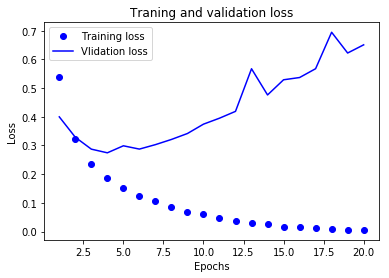

In [93]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Vlidation loss")
plt.title("Traning and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

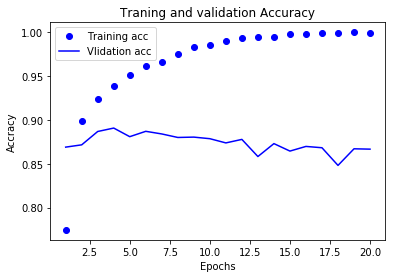

In [94]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Vlidation acc")
plt.title("Traning and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accracy")
plt.legend()
plt.show()

에폭이 4번째에서부터는 정확도가 점점 감소하는것을 볼 수 있습니다. 이는 모델이 **과적합**했기때문에 발생하는 현상입니다.  
따라서 4번째 에폭까지만 훈련한 모델을 사용하는것이 BEST 모델이라는 것을 알 수 있습니다.

In [95]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train,
          epochs = 4,
          batch_size = 512,
          validation_data = (x_val, y_val))
result = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 6s 369us/step - loss: 0.5325 - acc: 0.7917 - val_loss: 0.4058 - val_acc: 0.8699
Epoch 2/4
15000/15000 [==============================] - 5s 327us/step - loss: 0.3255 - acc: 0.8987 - val_loss: 0.3151 - val_acc: 0.8854
Epoch 3/4
15000/15000 [==============================] - 4s 259us/step - loss: 0.2355 - acc: 0.9244 - val_loss: 0.2827 - val_acc: 0.8895
Epoch 4/4
25000/25000 [==============================] - 16s 650us/step


In [97]:
result

[0.30161040325164795, 0.87724]

이러한 방법으로 약 87.7%의 정확도를 달성 하였습니다.